<a href="https://colab.research.google.com/github/saidileep-knv/Salary-Prediction-Portfolio/blob/master/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#SALARY PREDICTIONS BASED ON JOB DESCRIPTION



**Author:** Naga Venkata Saidileep Korlapati

**Email:** saidileep.knv@tamu.edu


---



**----Define the Problem----**


Predicting the salary for a job position is crucial for a business' HR & talent function for optimizing compensation strategy and talent retention in a highly competetive labour market. The aim of this project is to build a salary prediction model for existing and future job seekers by examining an existing dataset of job postings.

The analysis is aimed at explaining every step of the process from defining the problem, discovering dataset, developing model and deploying into production. The model applies data transformation and machine learning on features such as work experience, Job Type, Majors, Industry Type, Degree and Miles from metropolis. The final aim is to predict salary for a job posting based on these available features.

The data provided to us has been split in training and testing sets. The files included are training data (train_features_df), testing data (test_features_df) and a Target set (train_salaries_df) containing dependent salary feature.

The dataset includes available features or labelled columns for analysis as follows:

*   **jobId:** Given Job ID for the role
*   **companyId:** Company ID for the respective jobId advertised
*   **degree:** Applicant's qualification/degree
*   **major:** Degree Specialization
*   **industry:** Job ID's categorized industry such as Oil, Auto, Health, Finance etc.
*   **yearsExperience:** Requried Experience for the role
*   **milesFromMetropolis:** Distance of the job location in miles from the nearest metropolitan city
*   **salary:** In x1000 dollars of the respective jobId


 




In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
os.chdir("./gdrive/My Drive/SalaryPrediction")

In [0]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

**----Load the data----**

In [0]:
train_feature_df = pd.read_csv("train_features.csv")
train_target_df = pd.read_csv("train_salaries.csv")
test_feature_df = pd.read_csv("test_features.csv")

**----Examine the data----**

In [5]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [6]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [7]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


**Use .info() method to see length and dtypes of the data**

In [8]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [10]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


The data types of the features and the target are in the proper format.

**Check for duplicates**


In [11]:
print("Number of train feature duplicates: " + str(train_feature_df.duplicated().sum()))

Number of train feature duplicates: 0


In [12]:
print("Number of train target(salary) duplicates: " + str(train_target_df.duplicated().sum()))

Number of train target(salary) duplicates: 0


In [13]:
print("Number of test feature duplicates: " + str(test_feature_df.duplicated().sum()))

Number of test feature duplicates: 0


There are no duplicates present in the data.

**Identify numerical and categorical variables**

In [0]:
numeric_cols = ["yearsExperience", "milesFromMetropolis"]
categorical_cols = ["jobId", "companyId", "jobType", "degree", "major", "industry"]

**Merge Features and Target into a single dataframe**

In [0]:
#Merge te features and salaries on jobId
train_df = pd.merge(train_feature_df, train_target_df, on="jobId")

**Summarize numerical and categorical variables seperately** 

In [16]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [17]:
train_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [18]:
train_df.describe(include = ['O']) 

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685370268,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


Among the categorical columns, "jobId" is unique for all the rows in tha data and it doesn't play any role in the salary prediction, same with the "companyId" column. For the ease of analysis, these two columns will later be removed for modeling machine learning models. 

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


There is no missing data in the training dataframe. Also, the data types of appropriate corresponding to the columns in the data.

In [20]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


##**Explore the data(EDA)**

**Visualize target variable(salary)**

The black line in distribution plot shows the mean at:  116
The dotted blue line in the distribution plot shows the median at:  114


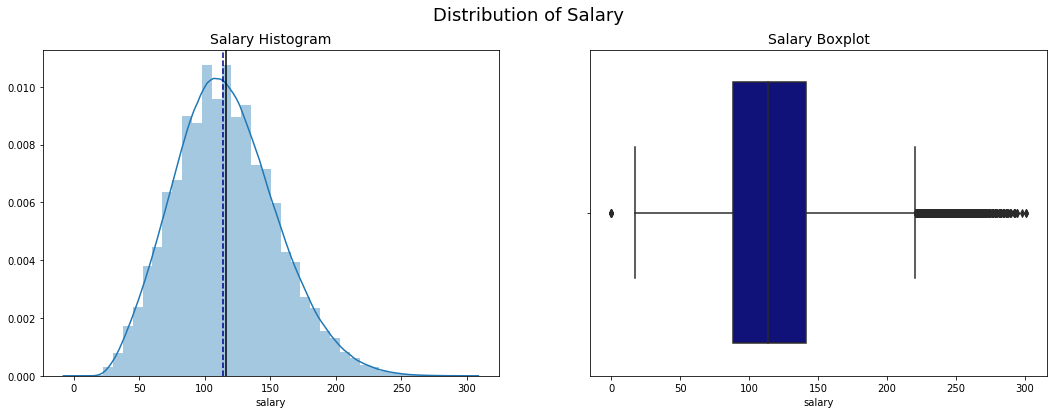

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.distplot(train_df.salary, ax=ax[0], bins=40, kde=True, norm_hist=True)
ax[0].axvline(np.mean(train_df.salary), color='black')
ax[0].axvline(np.median(train_df.salary), color='darkblue', linestyle='--')
ax[0].set_title("Salary Histogram", fontsize=14)
sns.boxplot(train_df.salary, ax=ax[1], color='darkblue')
ax[1].set_title("Salary Boxplot", fontsize=14)
f.suptitle("Distribution of Salary", fontsize=18)

print("The black line in distribution plot shows the mean at: ",
      round(train_df.salary.mean()))
print("The dotted blue line in the distribution plot shows the median at: ", 
      round(train_df.salary.median()))

Since the distribution of salary looks like normal, a little skewed to the right, we can use the IQR rule to detect the potential outliers since almost 95% in case of normal distribution lies within 25% quantile and 75% quantile.

**Use IQR rule to identify potential outliers in the target**

In [22]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print("\n The upper and lower bounds for suspected outliers are {} and {}.".format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

 The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [23]:
train_df[train_df.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


It is highly unlikely that a person with 18years and 11years of experience has zero salary which implies the data is corrupt or is missing and can likely be omitted from the analysis.

In [0]:
train_df = train_df[train_df.salary>=8.5] ##Remove rows corresponding to salary=0

In [7]:
#Resetting the index values
print(train_df.shape)
train_df.reset_index(drop = True).head()

(999995, 9)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [29]:
#check potential outlier above upper bound
train_df[train_df.salary>220.5].jobType.value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [30]:
#check the most suspicious potential outliers above upper bound i.e the rows corresponding to the JUNIOR role.
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


These suspicious outliers seem to be legitimate considering the industry they are employed in, years of experience and the degree. Hence, the data corresponding to these rows are included in the training data for analysis.

In [32]:
train_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

                     yearsExperience  milesFromMetropolis    salary
yearsExperience             1.000000             0.000672  0.375013
milesFromMetropolis         0.000672             1.000000 -0.297686
salary                      0.375013            -0.297686  1.000000


[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

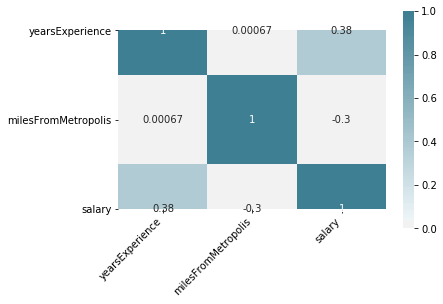

In [35]:
corr = train_df.corr()
print(corr)
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

The positive correlation between Salary and the years of experience explains the increase in salary with the increase in experience.

Also, the negative correlation between Salary and miles from Metropolis explains the pay in Urban areas.

**Unique value counts in the categorical features**

In [36]:
for feature in categorical_cols:
  if feature!='jobId' and feature!='companyId':
    print(train_df[feature].value_counts()) 
    print("\n")

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64


HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64


NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64


WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64




**Inference from Visualization plots**

In [0]:
def plot_feature(df, column):
    
    plt.figure(figsize = (13,6))
    plt.subplot(1,2,1)
    
    if df[column].dtype == 'int64':
        df[column].value_counts().sort_index().plot()
    else:
        #change categorical vairanle to category and order level by mean salary in each category
        mean = df.groupby(column)['salary'].mean()
        df[column] = df[column].astype('category')
        levels = mean.sort_values().index.tolist()
        df[column].cat.reorder_categories(levels, inplace = True)
        df[column].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel("Counts")

    plt.subplot(1,2,2)
    
    if df[column].dtype == 'int64' or column == 'companyId':
        #plot mean salary, fill between (mean - std, mean + std)
        mean = df.groupby(column)['salary'].mean()
        std = df.groupby(column)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)
    
    else:
        sns.boxplot(x=column, y='salary', data=df)
        
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

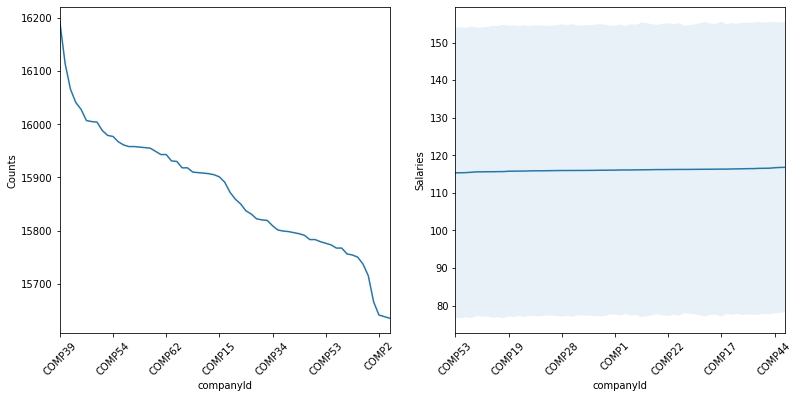

In [38]:
plot_feature(train_df, 'companyId')

It is clear that the CompanyId has no correlation with the salary as expected since the salary varies with different roles in the company.

CompanyId can then be dropped from the training data as it shows no sigificance over the salary for prediction purpose.

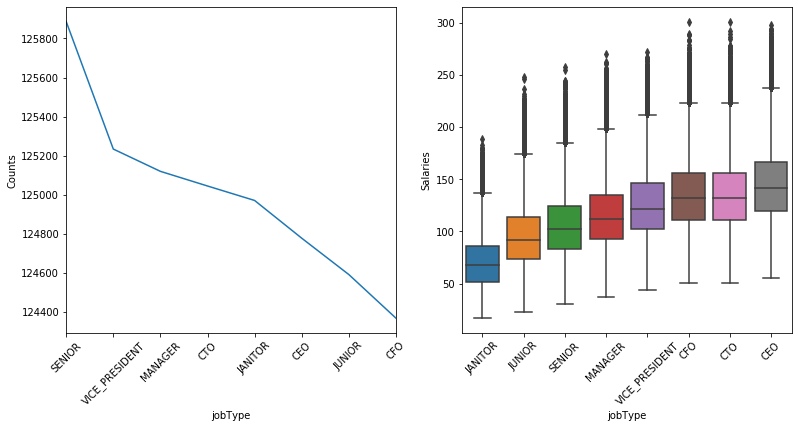

In [39]:
plot_feature(train_df, 'jobType')

Salary varies with the jobType as higher level positions usually tend to get higher salary.

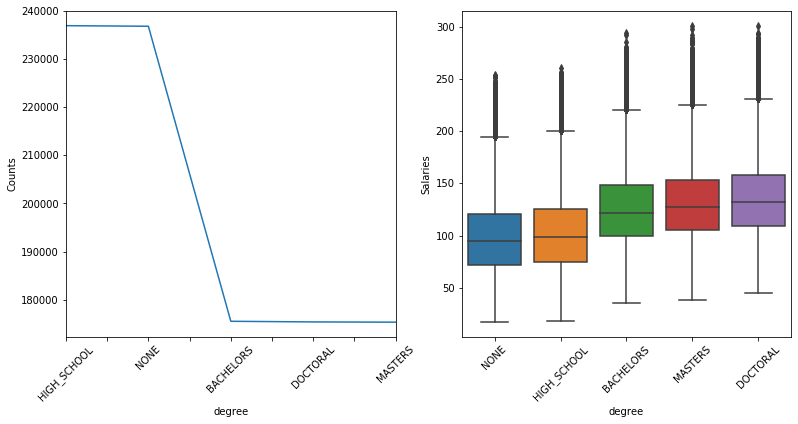

In [40]:
plot_feature(train_df, 'degree')

A college degree corresponds to having higher salary thank high school or no education. Clearly, salary seems to increase with the advance in degree.

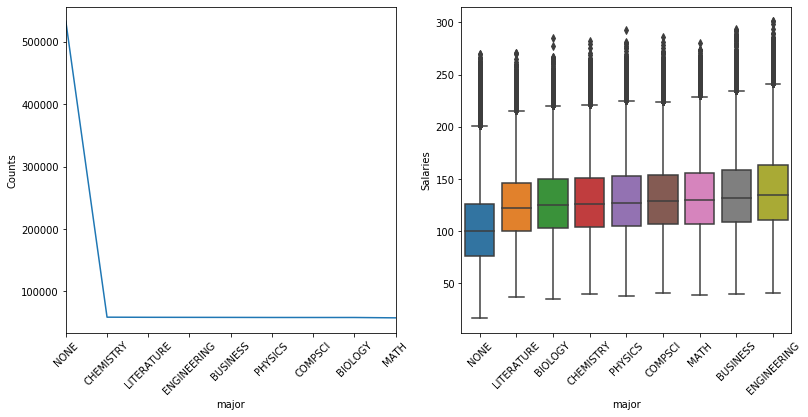

In [41]:
plot_feature(train_df, 'major')

Having a major definitely leads to a better pay as is indicative from the plot. Engineering, business and math majors have the highest pay among other majors in the data.

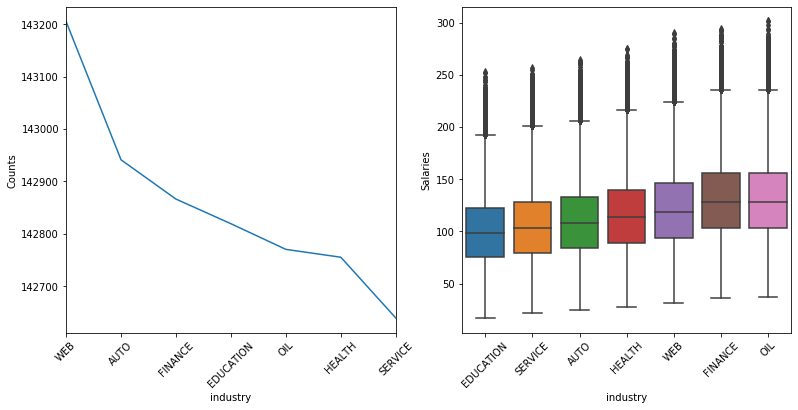

In [42]:
plot_feature(train_df, 'industry')

Oil industries pay the highest followed by Finance and Education industry pays the least among others.

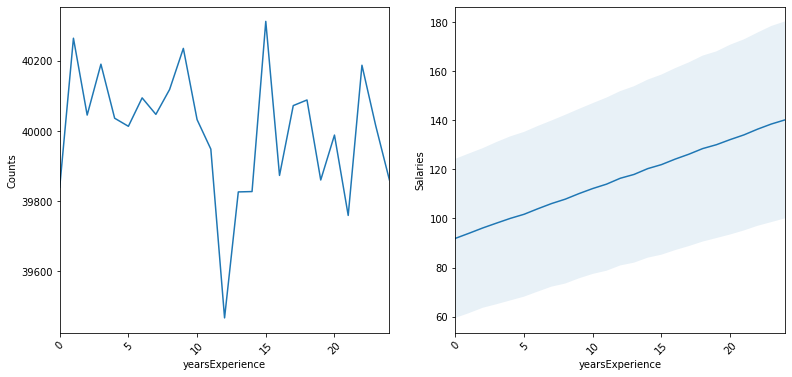

In [43]:
plot_feature(train_df, 'yearsExperience')

Salary tends to increse with experience showing a positive trend.

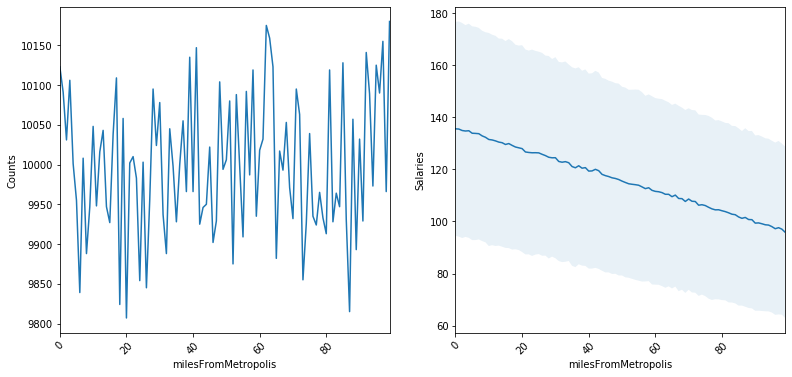

In [44]:
plot_feature(train_df, 'milesFromMetropolis')

Employees residing in the urban areas get paid the highest and salary decreases as they move out of the urban areas which is the usual case in the business world.

##**Data Encoding**

In [0]:
def one_hot_encoding(df, cat_variables=None, num_variables=None):
    cat_df = pd.get_dummies(df[cat_variables])
    num_df = df[num_variables].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)

In [0]:
train_df.drop(['jobId','companyId'], axis=1, inplace=True)

In [0]:
##Remove jobId and companyId from the list
categorical_cols = ['jobType','degree','major','industry'] 
##Add salary column to the numeric columns list
numeric_cols = ["yearsExperience", "milesFromMetropolis", "salary"] 

In [0]:
train_df_encoded = one_hot_encoding(train_df, categorical_cols, numeric_cols)

**Correlation Plot**

Since all the fatures are encoded, it is now possible to find the correlation between salary and the encoded categorical features.

In [50]:
corr=train_df_encoded.corr()
cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(220,20,sep=20, as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

,jobType_JANITOR,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,degree_NONE,degree_HIGH_SCHOOL,degree_BACHELORS,degree_MASTERS,degree_DOCTORAL,major_NONE,major_LITERATURE,major_BIOLOGY,major_CHEMISTRY,major_PHYSICS,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_EDUCATION,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL,yearsExperience,milesFromMetropolis,salary
jobType_JANITOR,1,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,0.23,0.23,-0.17,-0.17,-0.17,0.35,-0.094,-0.094,-0.095,-0.094,-0.094,-0.094,-0.094,-0.094,0.0002,0.00023,0.0019,-0.0011,0.00053,-0.00048,-0.0013,-0.0012,-0.0011,-0.44
jobType_JUNIOR,-0.14,1,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.034,-0.032,0.024,0.024,0.025,-0.05,0.014,0.012,0.013,0.012,0.013,0.013,0.013,0.015,0.0016,-0.00011,2.3e-05,0.0015,-3.7e-05,-0.00036,-0.0025,-1.2e-06,0.0017,-0.2
jobType_SENIOR,-0.14,-0.14,1,-0.14,-0.14,-0.14,-0.14,-0.14,-0.033,-0.035,0.026,0.025,0.026,-0.052,0.014,0.015,0.015,0.014,0.013,0.012,0.013,0.015,0.00083,0.0005,-0.0015,-0.00022,-0.00074,-0.00071,0.0019,0.00022,0.00057,-0.1
jobType_MANAGER,-0.14,-0.14,-0.14,1,-0.14,-0.14,-0.14,-0.14,-0.032,-0.034,0.024,0.026,0.024,-0.05,0.015,0.014,0.012,0.014,0.012,0.013,0.013,0.014,-0.00086,0.00012,0.0019,-0.0011,-0.00091,0.00071,0.00015,-0.00027,-0.00041,-0.0068
jobType_VICE_PRESIDENT,-0.14,-0.14,-0.14,-0.14,1,-0.14,-0.14,-0.14,-0.034,-0.032,0.025,0.023,0.026,-0.05,0.013,0.013,0.014,0.012,0.011,0.015,0.014,0.013,-0.0014,-7.2e-05,-0.00075,0.0023,-2.8e-05,0.00011,-0.00012,6.8e-05,-0.0013,0.091
jobType_CFO,-0.14,-0.14,-0.14,-0.14,-0.14,1,-0.14,-0.14,-0.034,-0.032,0.025,0.026,0.023,-0.05,0.011,0.014,0.013,0.013,0.014,0.014,0.013,0.013,-0.00093,-0.00077,-0.0014,0.0019,0.0011,0.00078,-0.00063,-0.0001,0.00057,0.19
jobType_CTO,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,1,-0.14,-0.034,-0.034,0.025,0.027,0.024,-0.051,0.015,0.012,0.014,0.013,0.015,0.015,0.014,0.012,0.00045,0.00092,-0.00074,-0.0016,-0.0002,-0.00079,0.0019,0.00097,0.00067,0.19
jobType_CEO,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,1,-0.033,-0.035,0.026,0.024,0.026,-0.051,0.013,0.013,0.014,0.015,0.016,0.012,0.013,0.013,0.00015,-0.00082,0.00062,-0.0016,0.00033,0.00075,0.00059,0.00031,-0.00067,0.29
degree_NONE,0.23,-0.034,-0.033,-0.032,-0.034,-0.034,-0.034,-0.033,1,-0.31,-0.26,-0.26,-0.26,0.52,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.00056,0.0025,0.00038,-0.001,-0.00087,0.00015,-0.0006,-7.4e-05,-0.001,-0.26
degree_HIGH_SCHOOL,0.23,-0.032,-0.035,-0.034,-0.032,-0.032,-0.034,-0.035,-0.31,1,-0.26,-0.26,-0.26,0.52,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,0.0014,-0.0011,-0.002,0.00025,0.0012,-0.00058,0.00085,0.00024,-0.0014,-0.2


**Split the training data to training set and validation set in a 80:20 ratio.**

In [13]:
features = train_df_encoded.drop('salary', axis=1)
target = train_df_encoded['salary']

feat_train, feat_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=999)
print("Number of training samples:", feat_train.shape[0])
print("Number of validation samples:", feat_valid.shape[0])

Number of training samples: 799996
Number of validation samples: 199999


##**Model Building**

**Having performed EDA and establishing that this is a regression problem, we know that we are to predict the continuous variable, salary from the cleaned data.**

---

Establish Simple linear regression as the baseline model.

###**Establish a Baseline** - Linear Regression

In [52]:
lr = LinearRegression()
lr.fit(feat_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
##Intercept and slope of the Linear Regression model
print("The slope of the linear regression model is", lr.coef_)
print("the intercept of the linear regression model is", lr.intercept_)

The slope of the linear regression model is [ 3.84166821e+05  3.84179394e+05  3.84189430e+05  3.84199309e+05
  3.84209200e+05  3.84219371e+05  3.84219374e+05  3.84229181e+05
  2.99602397e+10  2.99602397e+10  2.99602397e+10  2.99602397e+10
  2.99602397e+10  6.30455138e+10  6.30455138e+10  6.30455138e+10
  6.30455138e+10  6.30455138e+10  6.30455138e+10  6.30455138e+10
  6.30455138e+10  6.30455138e+10  6.47270106e+10  6.47270106e+10
  6.47270106e+10  6.47270106e+10  6.47270106e+10  6.47270107e+10
  6.47270107e+10  2.01032772e+00 -3.99691030e-01]
the intercept of the linear regression model is -157733148191.46216


**Evaluating model accuracy using MSE and R-squared**

**R-squared** also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the **R-squared** is the percentage of the variation of response variable(y) that is explained by the linear model.


The **mean squared error** measures the average of the squares of errors, that is, difference between actual value and the estimated value.

In [54]:
pred_salary_lr = lr.predict(feat_valid)   ##Predicting the validation data   
print("Mean Squared Error of the linear regression model on training data is: ", mean_squared_error(target_train, lr.predict(feat_train)))
print("Mean Squared Error of the linear regression model on validation data is: ", mean_squared_error(target_valid, pred_salary_lr))
print("The R-square is: ", r2_score(target_valid, pred_salary_lr))

Mean Squared Error of the linear regression model on training data is:  384.5034681632502
Mean Squared Error of the linear regression model on validation data is:  383.90377983613433
The R-square is:  0.7432473316008961


In [55]:
##Prediction accuracy using 10-cross validation
cv_score = cross_val_score(lr, feat_train, target_train, cv=10)
print("The 10-cross validation accuracy is: ", (cv_score.mean(), cv_score.std()))

The 10-cross validation accuracy is:  (0.7436315877399207, 0.0016194734558990175)


**Distribution plot for effective demonstration of how the predicted values of the training data are distributed.**

In [0]:
##Define the function for Distribution plot

def DistributionPlot(valid_df, pred_valid, name1, name2, Title):
  width = 10
  height = 8
  plt.figure(figsize=(width, height))

  ax1 = sns.distplot(valid_df, hist=False, color="r", label = name1)
  ax2 = sns.distplot(pred_valid, hist=False, color="b", label=name2, ax=ax1)

  plt.title(Title)
  plt.xlabel("salary")
  plt.ylabel("Mean values")
  plt.show()
  plt.close()

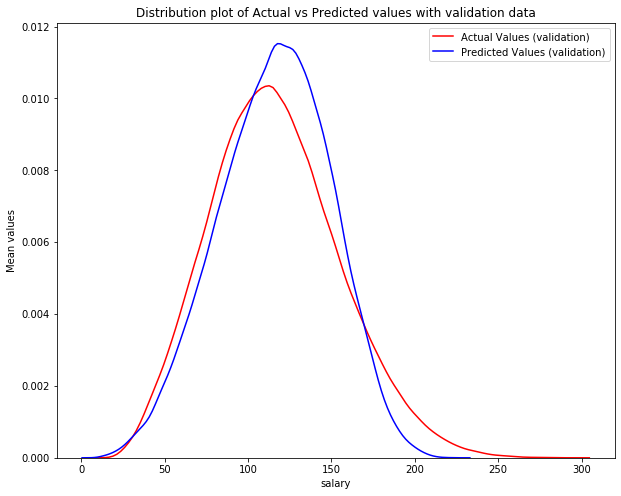

In [57]:
##Distribution plot for the validation data
Title = "Distribution plot of Actual vs Predicted values with validation data"
DistributionPlot(target_valid, pred_salary_lr, "Actual Values (validation)",
                 "Predicted Values (validation)", Title)

Plots are nearly the same with few minor differences as in the mean of the predicted values is high and the range of the predicted values is less.

###Hypothesize Solution

We have an MSE score of 383.9 from the baseline model with 74.4% accuracy.

---
We can attempt to improve the score by comparing our baseline model against the following models:


1.   Polynomial Transformation
2.   Ridge Regression
3.   Random Forest Regressor
4.   Gradient Boosting Regressor




In [58]:
#Training and validation sets size
print("Feature training set shape: ", feat_train.shape)
print("Feature validation set shape: ", feat_valid.shape)
print("Target training set shape: ", target_train.shape)
print("Target validation set shape: ", target_valid.shape)

Feature training set shape:  (799996, 31)
Feature validation set shape:  (199999, 31)
Target training set shape:  (799996,)
Target validation set shape:  (199999,)


###Polynomial Transformation

Applying second order polynomial

In [59]:
#Creating an object for polynomial transformation
pt = PolynomialFeatures(2)
feat_train_p = pt.fit_transform(feat_train)
feat_valid_p = pt.fit_transform(feat_valid)
print(pt)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')


In [60]:
##Applying polynomial regression on the training data
plr = LinearRegression()
plr.fit(feat_train_p, target_train)

##Predicting salaries after fitting polynomial regression on the training data
pred_salary_plr = plr.predict(feat_valid_p)
pred_salary_plr

array([127.70298672, 122.26709127, 188.26353323, ...,  76.47077835,
        53.31402206, 165.51636028])

In [61]:
print("First 5 predicted salaries on validation data: ", pred_salary_plr[0:5])
print("First 5 actual salaries in the validation data: ", target_valid[0:5].values)

First 5 predicted salaries on validation data:  [127.70298672 122.26709127 188.26353323 104.53563201  64.65615416]
First 5 actual salaries in the validation data:  [118 134 170  99  59]


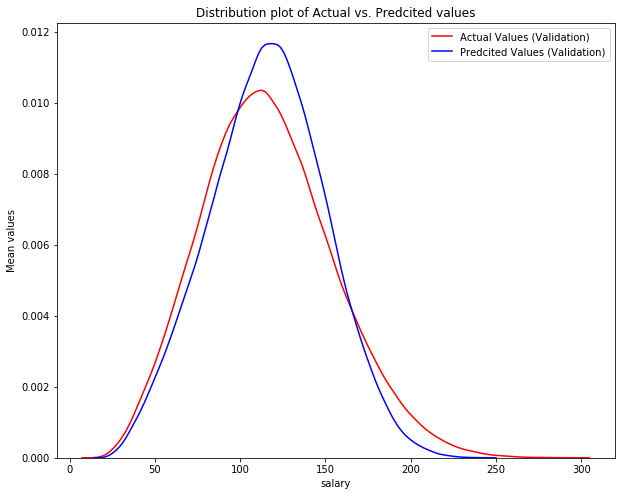

In [62]:
##Comparing actual and predicted values with distribution plot
Title = "Distribution plot of Actual vs. Predcited values"
DistributionPlot(target_valid, pred_salary_plr, "Actual Values (Validation)",
                 "Predcited Values (Validation)", Title)

In [63]:
##Model Evaluation
print("Mean Squared Error of the Polynomoal Regression model on training data is: ", 
      mean_squared_error(target_train, plr.predict(feat_train_p)))
print("Mean Squared Error of the Polynomial Regression model on validation data is: ", 
      mean_squared_error(target_valid, pred_salary_plr))
print("R Squared on the validation set is: ", r2_score(target_valid,pred_salary_plr))

Mean Squared Error of the Polynomoal Regression model on training data is:  353.8297657270023
Mean Squared Error of the Polynomial Regression model on validation data is:  353.42169646151086
R Squared on the validation set is:  0.7636335759044535


In [0]:
cv_score_plr = cross_val_score(plr, feat_train_p, target_train, cv=10 )

In [65]:
print("Accuracy of the model on 10-fold Cross Validation is: ", cv_score_plr.mean())

Accuracy of the model on 10-fold Cross Validation is:  0.7639041642564253


**There is a significant improvement in the MSE and prediction accuracy on polynomial transformation**

###Ridge Regressor

In [0]:
##Create a Ridge Regressor object
rrg = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], cv=10)
rrg.fit(feat_train_p, target_train)

In [74]:
print("The R-squared score is:", rrg.score(feat_valid_p, target_valid))

The R-squared score is: 0.7636355960795026


In [75]:
rrg

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 5.e+00, 1.e+01]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [76]:
##Predict salaries after applying Ridge regression
pred_salary_rrg = rrg.predict(feat_valid_p)
print("First 5 predicted salaries on validation data: ", pred_salary_rrg[0:5])
print("First 5 Actual values of salaries in the validation data: ", target_valid[0:5].values)

First 5 predicted salaries on validation data:  [127.70828223 122.23763878 188.26704916 104.50594335  64.62277698]
First 5 Actual values of salaries in the validation data:  [118 134 170  99  59]


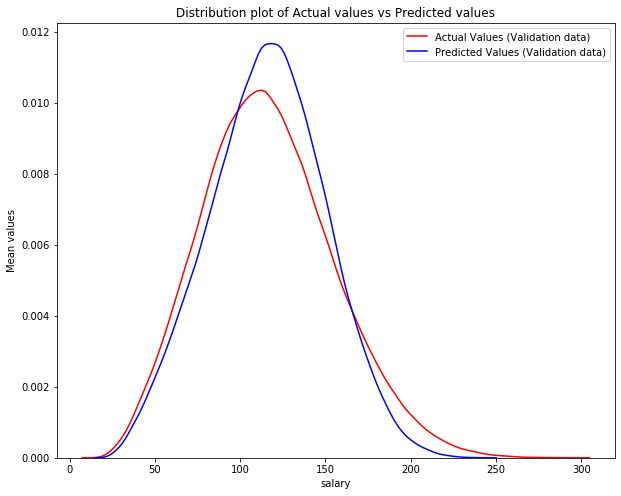

In [77]:
##Comparing actual and predicted values with distribution plot
Title = "Distribution plot of Actual values vs Predicted values"
DistributionPlot(target_valid, pred_salary_rrg, "Actual Values (Validation data)",
                 "Predicted Values (Validation data)", Title)

In [78]:
##Evaluation of the ridge regression model
print("Mean squared error of the model on training data is: ", mean_squared_error(target_train, rrg.predict(feat_train_p))) 
print("Mean squared error of the model on validation data is: ", mean_squared_error(target_valid, pred_salary_rrg))
print("Valid Data R-square is: ", r2_score(target_valid,pred_salary_rrg))

Mean squared error of the model on training data is:  353.8283693961812
Mean squared error of the model on validation data is:  353.41867583920487
Valid Data R-square is:  0.7636355960795026


There is no significant improvement over polynomial linear regression.





###Random Forest Regressor


In [79]:
##Create a random forest regressor object
rf = RandomForestRegressor(random_state=99)
print("Parameters currently in use: \n")
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}


**Random Hyperparameter Grid**

In [81]:
#Number of trees in Random Forest
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
#Number of features to consider at every split
#max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=2)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
bootstrap = [True, False]
#Number of jobs to run in parallel for both fit and predict
n_jobs = [1, -1]

param_grid = {'n_estimators': n_estimators,'max_depth': max_depth, 'min_samples_split': min_samples_split}
pprint(param_grid)

{'max_depth': [10, 100, None],
 'min_samples_split': [2, 10],
 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]}


In [82]:
com = 1
for x in param_grid.values():
  com *= len(x)
print("There are {} combinations".format(com))

There are 54 combinations


On assuming 60sec per evaluation, lets see how many hours this would take:

In [83]:
print("This would take {:.0f} hours to finish.".format((60*com) / (60*60)))

This would take 1 hours to finish.


In [0]:
feat_sample = feat_train_p[0:10000]
target_sample = target_train[0:10000]

In [85]:
rf_rcv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3)
rf_rcv.fit(feat_sample, target_sample)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=9

In [86]:
rf_rcv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=99, verbose=0,
                      warm_start=False)

In [87]:
rf_rcv.best_params_

{'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 100}

In [0]:
rf_best = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=673,
                      n_jobs=None, oob_score=False, random_state=99, verbose=0,
                      warm_start=False)

In [89]:
rf_best.fit(feat_train_p, target_train)
rf_best.score(feat_valid_p, target_valid)

0.7430467831895691

In [90]:
##Predict the salaries using Random Forest regressor with the choosen best parameters
pred_salary_rf = rf_best.predict(feat_valid_p)
print("First 5 predicted salaries on validation data: ", pred_salary_rf[0:5])
print("First 5 Actual values of salaries in the validation data: ", target_valid[0:5].values)

First 5 predicted salaries on validation data:  [129.5145443  126.78650681 185.03946884 110.75914736  63.69418884]
First 5 Actual values of salaries in the validation data:  [118 134 170  99  59]


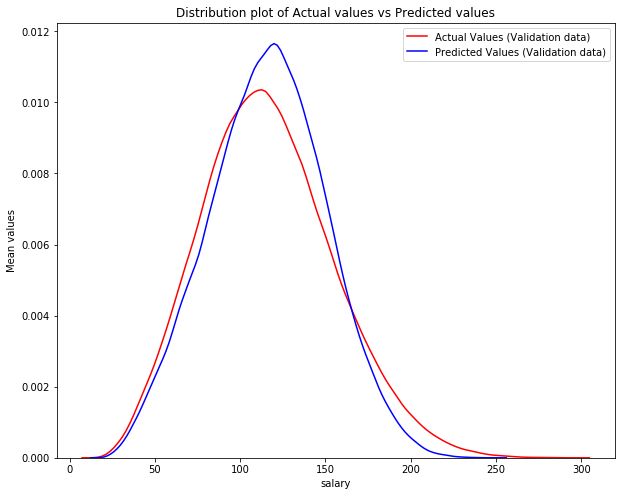

In [91]:
##Comparing actual and predicted values with distribution plot
Title = "Distribution plot of Actual values vs Predicted values"
DistributionPlot(target_valid, pred_salary_rf, "Actual Values (Validation data)",
                 "Predicted Values (Validation data)", Title)

In [96]:
##Evaluation of the Random Forest model 
#print("Mean squared error of the model on training data is: ", mean_squared_error((target_train, rf_best.predict(feat_train_p))))
print("Mean squared error of the model on validation data is: ", mean_squared_error(target_valid, pred_salary_rf))
print("Validation Data R-square is: ", r2_score(target_valid,pred_salary_rf))

Mean squared error of the model on validation data is:  384.2036454368646
Validation Data R-square is:  0.7430467831895691


The MSE of Random Forest Regressor is no worse than Linear Regression.
Polynomial Regression clearly scores higher on both MSE and R-square. 

###Gradient Boosting Regression

In [97]:
#create a gradient boosting regressor object
gbr = GradientBoostingRegressor(random_state=999)
print("Parameters currently in use: \n", gbr.get_params())

Parameters currently in use: 
 {'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 999, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


**Random Hyperparameter grid**

In [98]:
n_estimators = [100,200,300]
learning_rate = [0.001,0.01,0.05,0.1,1,10]
param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}
pprint(param_grid)

{'learning_rate': [0.001, 0.01, 0.05, 0.1, 1, 10],
 'n_estimators': [100, 200, 300]}


In [0]:
gbr_rcv = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, cv=3)
gbr_rcv.fit(feat_sample, target_sample)

In [103]:
print("The R-squared of the model is: ", gbr_rcv.score(feat_valid_p, target_valid))

The R-squared of the model is:  0.7476326625877119


In [104]:
gbr_rcv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=999, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
gbr_rcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [112]:
##Predict the salaries using Gradient Boosting Regressor with the choosen best parameters
pred_salary_gbr = gbr_rcv.predict(feat_valid_p)
print("First 5 predicted salaries on validation data: ", pred_salary_gbr[0:5])
print("First 5 Actual values of salaries in the validation data: ", target_valid[0:5].values)

First 5 predicted salaries on validation data:  [128.3570268  122.89626189 168.15006436 101.46402143  62.92398995]
First 5 Actual values of salaries in the validation data:  [118 134 170  99  59]


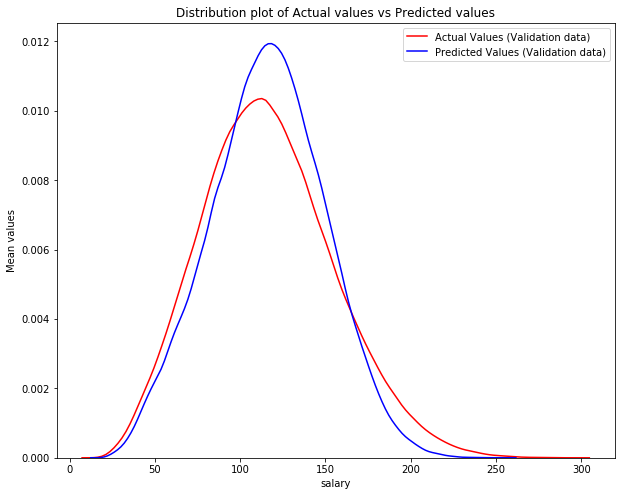

In [113]:
##Comparing actual and predicted values with distribution plot
Title = "Distribution plot of Actual values vs Predicted values"
DistributionPlot(target_valid, pred_salary_gbr, "Actual Values (Validation data)",
                 "Predicted Values (Validation data)", Title)

In [114]:
##Evaluation of the Gradient Boosting Regressor model
print("Mean squared error of the Gradient Boosting Regressor on the training data is: ", mean_squared_error(target_train, gbr_rcv.predict(feat_train_p))) 
print("Mean squared error of the Gradient Boosting Regressor on the validation is: ", mean_squared_error(target_valid, pred_salary_gbr))
print("Validation Data R-square is: ", r2_score(target_valid,pred_salary_gbr))

Mean squared error of the Gradient Boosting Regressor on the training data is:  376.585687333668
Mean squared error of the Gradient Boosting Regressor on the validation is:  377.34671013879364
Validation Data R-square is:  0.7476326625877119


Gradient Boosting regressor performed better than the baseline model yet it could not outperform polynomial transformation.

**Select the Best Model**


In [115]:
#select the model with the lowest error as your "prodcuction" model
print("MSE for Linear Regression: ", mean_squared_error(target_valid, pred_salary_lr).round())
print("MSE for Polynomial Regressor: ", mean_squared_error(target_valid, pred_salary_plr).round())
print("MSE for Ridge Regressor: ", mean_squared_error(target_valid, pred_salary_rrg).round())
print("MSE for Random Forest: ", mean_squared_error(target_valid, pred_salary_rf).round())
print("MSE for Gradient Boosting Regressor: ", mean_squared_error(target_valid, pred_salary_gbr).round())

MSE for Linear Regression:  384.0
MSE for Polynomial Regressor:  353.0
MSE for Ridge Regressor:  353.0
MSE for Random Forest:  384.0
MSE for Gradient Boosting Regressor:  377.0


The ideal model for this dataset would be to choose polynomial regression.

Although Ridge ression used the features transformed to 2nd order for training, it didnot show any significant improvement in the MSE and the accuracy over polynomial regression.

##**Automate and Deploy Model**

**Automate Pipeline**

To deploy the selected model, an data piepline is created to automate the needed transformations for any given data as input.

In [14]:
#Pipeline
input = [('scale', StandardScaler()), ('transformation', PolynomialFeatures(include_bias = False)),
         ('model', LinearRegression())] #We do not need a bias column where all polynomial powers are 0
pipe = Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transformation',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
#Fit pipeline to the data
PolyR_model = pipe.fit(features, target)

The pipeline will normalize, transform and produce predictions.

In [16]:
pred_pipe = pipe.predict(features)
pred_pipe[0:5]

array([126.9453125 , 116.66015625, 134.9140625 , 120.80078125,
       142.64453125])

The model will be saved and can be used whenever required.

In [30]:
filename = "Salary_Prediction_Model.csv"
joblib.dump(PolyR_model, filename)

['Salary_Prediction_Model.csv']

We can test our model by loading it to a variable and using it as required

In [31]:
#Load Model
load_model = joblib.load(filename)

#Model Result
result = load_model.score(feat_valid, target_valid)
print(result)

0.7637780883377557


**Deploy Solution**

In [33]:
# Load new data into dataframe
test_features_df = pd.DataFrame(test_feature_df)

#convert data types of the categorical columns of the test data to 'category'- 
test_features_df[['jobId', 'companyId', 'jobType', 'degree', 'major','industry']] = test_features_df[['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']].astype('category')
print(test_features_df.dtypes)

# Drop features not relevant to salary prediction
test_features_df.drop('jobId', axis=1, inplace=True)
test_features_df.drop('companyId', axis=1, inplace=True)

jobId                  category
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
dtype: object


In [37]:
# One-hot encode categorical data
categorical_columns = ['jobType', 'degree', 'major', 'industry']
numerical_columns = ['yearsExperience', 'milesFromMetropolis']
test_features_df = one_hot_encoding(test_features_df,
                                    categorical_columns, numerical_columns)

# View top 5 rows of data
test_features_df.head(5)

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,22,73
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,20,47
2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17,9
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,14,96
4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,44


In [38]:
##Check for null values
test_features_df.isnull().sum()

jobType_CEO               0
jobType_CFO               0
jobType_CTO               0
jobType_JANITOR           0
jobType_JUNIOR            0
jobType_MANAGER           0
jobType_SENIOR            0
jobType_VICE_PRESIDENT    0
degree_BACHELORS          0
degree_DOCTORAL           0
degree_HIGH_SCHOOL        0
degree_MASTERS            0
degree_NONE               0
major_BIOLOGY             0
major_BUSINESS            0
major_CHEMISTRY           0
major_COMPSCI             0
major_ENGINEERING         0
major_LITERATURE          0
major_MATH                0
major_NONE                0
major_PHYSICS             0
industry_AUTO             0
industry_EDUCATION        0
industry_FINANCE          0
industry_HEALTH           0
industry_OIL              0
industry_SERVICE          0
industry_WEB              0
yearsExperience           0
milesFromMetropolis       0
dtype: int64

The cleaned test data can now be used to predict salaries using linear regression.

In [39]:
salary_predictions = load_model.predict(test_features_df)
#View the top five predictions
salary_predictions[0:5]

array([111.265625  ,  92.890625  , 183.20703125, 103.88671875,
       116.3203125 ])

Plotting Feature Importance

feature importance plotting...
jobType_CEO               0.004444
jobType_CFO               0.004335
jobType_CTO               0.004125
jobType_JANITOR           0.001242
jobType_JUNIOR            0.004219
jobType_MANAGER           0.004074
jobType_SENIOR            0.004480
jobType_VICE_PRESIDENT    0.004454
degree_BACHELORS          0.004462
degree_DOCTORAL           0.003931
degree_HIGH_SCHOOL        0.002225
degree_MASTERS            0.004189
degree_NONE               0.002190
major_BIOLOGY             0.003600
major_BUSINESS            0.003400
major_CHEMISTRY           0.003449
major_COMPSCI             0.003490
major_ENGINEERING         0.003516
major_LITERATURE          0.003575
major_MATH                0.003430
major_NONE                0.003883
major_PHYSICS             0.003332
industry_AUTO             0.004297
industry_EDUCATION        0.004203
industry_FINANCE          0.004209
industry_HEALTH           0.004167
industry_OIL              0.004345
industry_SERVICE        

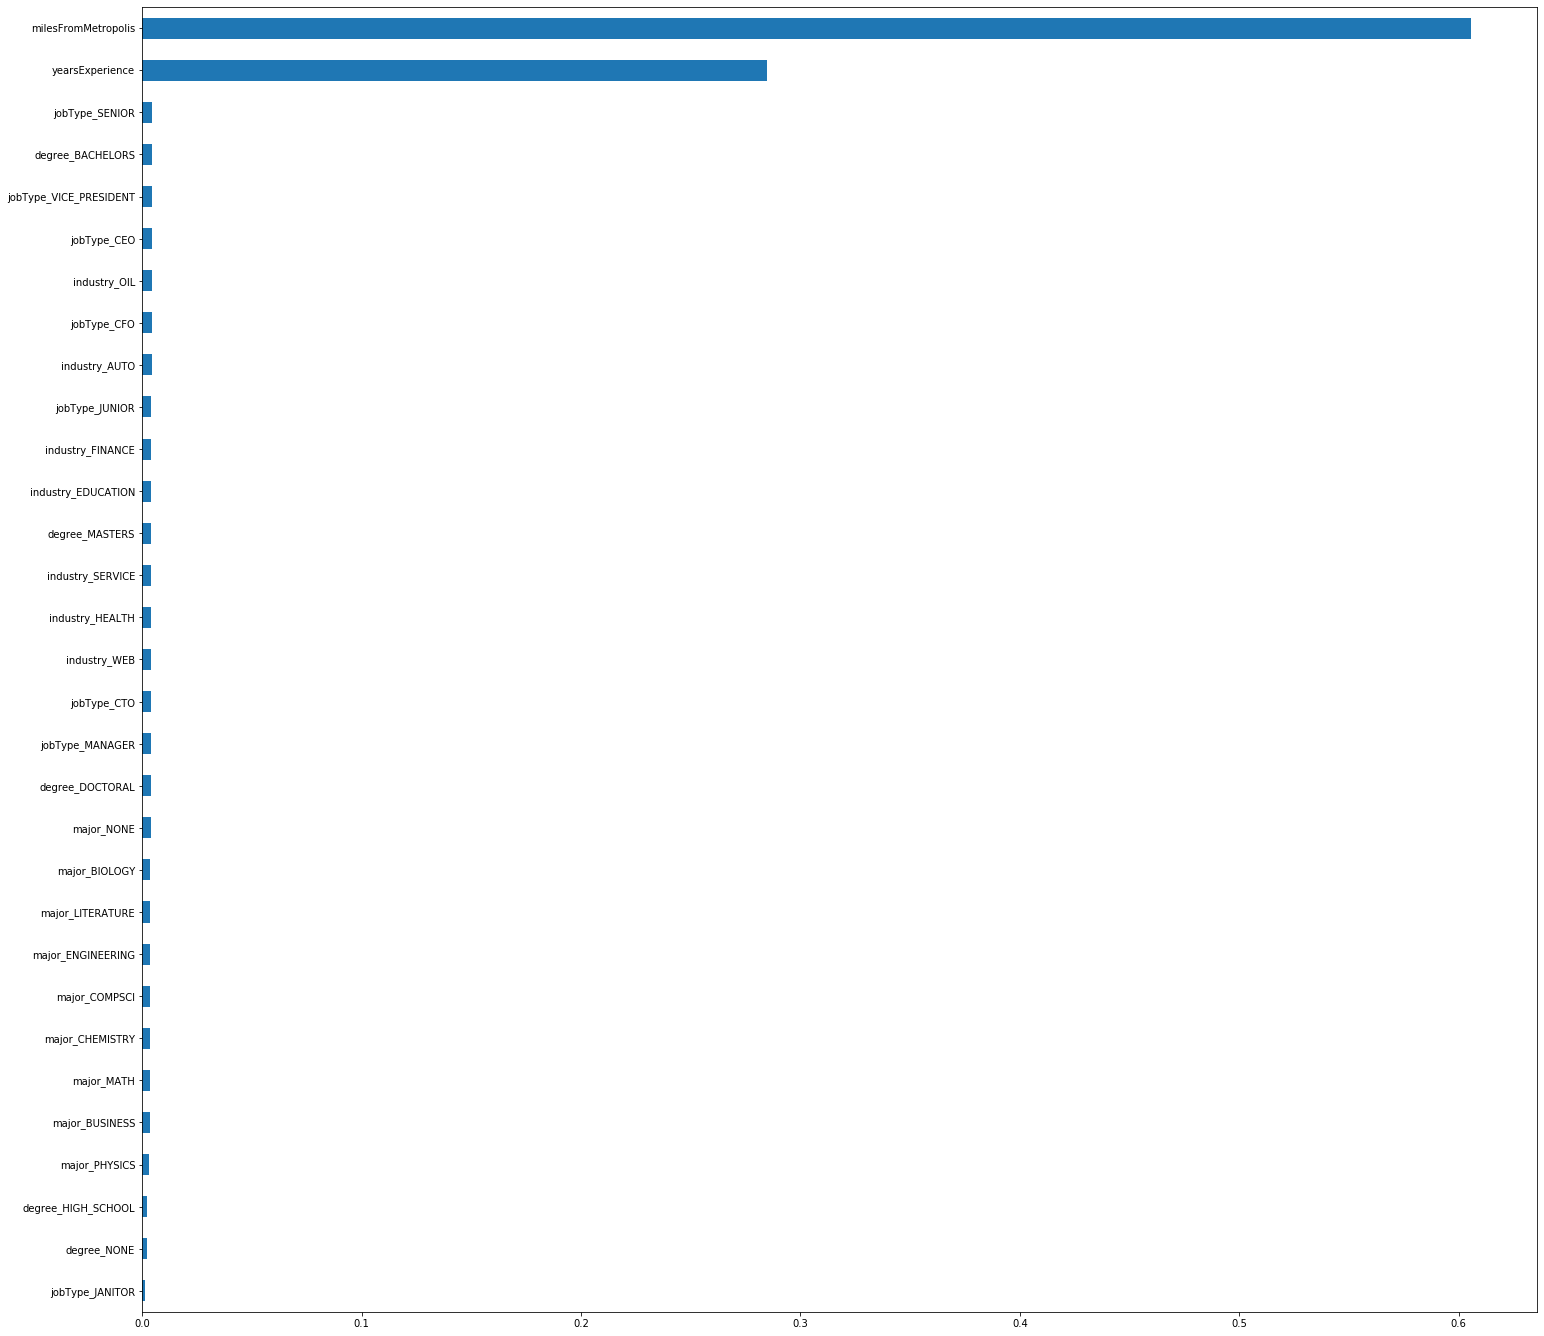

In [41]:
target = train_target_df.salary

print("feature importance plotting...")
rf_best.fit(test_features_df, target)
feature_importances = pd.Series(rf_best.feature_importances_, index=test_features_df.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(25,24))

The developed model suggests that milesFromMetropolis and yearsExperience are the most important features.

##**Summary**

To summarize, the application of a **2nd order polynomial transformation** on a **linear regression** gave the least **MSE** of **353** and most **accuracy** of **76.4%**. 

This model can provide the most accurate results when supplied with information on yearsExperience, milesFromMetropolis, jobType, degree and major.